# **Manga Analysis**
#### **Group Members:** 
- Devanshi Joshi 
- Aneesh Krishna
- Kosisochukwu Ibe

In [3]:
# Importing the libraries
import pandas as pd 
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# Importing the dataset
mangaCsv = pd.read_csv('mangaCsv.csv')
mangaCsv.head(4)

,manga_id,title,type,score,scored_by,status,volumes,chapters,start_date,end_date,...,demographics,authors,serializations,synopsis,background,main_picture,url,title_english,title_japanese,title_synonyms
0,2,Berserk,manga,9.47,319696,currently_publishing,NaN,NaN,1989-08-25,NaN,...,['Seinen'],"[{'id': 1868, 'first_name': 'Kentarou', 'last_...",['Young Animal'],"Guts, a former mercenary now known as the ""Bla...",Berserk won the Award for Excellence at the si...,https://cdn.myanimelist.net/images/manga/1/157...,https://myanimelist.net/manga/2/Berserk,Berserk,ベルセルク,['Berserk: The Prototype']
1,13,One Piece,manga,9.22,355375,currently_publishing,NaN,NaN,1997-07-22,NaN,...,['Shounen'],"[{'id': 1881, 'first_name': 'Eiichiro', 'last_...",['Shounen Jump (Weekly)'],"Gol D. Roger, a man referred to as the ""King o...",One Piece is the highest selling manga series ...,https://cdn.myanimelist.net/images/manga/2/253...,https://myanimelist.net/manga/13/One_Piece,One Piece,ONE PIECE,[]
2,1706,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,manga,9.30,151433,finished,24.0,96.0,2004-01-19,2011-04-19,...,"['Seinen', 'Shounen']","[{'id': 2619, 'first_name': 'Hirohiko', 'last_...",['Ultra Jump'],"In the American Old West, the world's greatest...",JoJo no Kimyou na Bouken Part 7: Steel Ball Ru...,https://cdn.myanimelist.net/images/manga/3/179...,https://myanimelist.net/manga/1706/JoJo_no_Kim...,NaN,ジョジョの奇妙な冒険 Part7 STEEL BALL RUN,"[""JoJo's Bizarre Adventure Part 7: Steel Ball ..."
3,4632,Oyasumi Punpun,manga,9.02,168459,finished,13.0,147.0,2007-03-15,2013-11-02,...,['Seinen'],"[{'id': 2836, 'first_name': 'Inio', 'last_name...",['Big Comic Spirits'],Punpun Onodera is a normal 11-year-old boy liv...,Oyasumi Punpun was originally serialized in Yo...,https://cdn.myanimelist.net/images/manga/3/266...,https://myanimelist.net/manga/4632/Oyasumi_Punpun,Goodnight Punpun,おやすみプンプン,[]


#### Pre-processing

 Dropping columns that are irrelevant to the analysis

In [5]:
columns_to_drop = ['manga_id','title_synonyms', 'title_japanese', 'demographics','title_english','url','main_picture','background','authors','serializations','synopsis','approved','created_at_before','updated_at','real_start_date','real_end_date'] 
mangaCsv.drop(columns=columns_to_drop, axis=1, inplace=True)


In [6]:
mangaCsv.head()

,title,type,score,scored_by,status,volumes,chapters,start_date,end_date,members,favorites,sfw,genres,themes
0,Berserk,manga,9.47,319696,currently_publishing,NaN,NaN,1989-08-25,NaN,643969,119470,True,"['Action', 'Adventure', 'Award Winning', 'Dram...","['Gore', 'Military', 'Mythology', 'Psychologic..."
1,One Piece,manga,9.22,355375,currently_publishing,NaN,NaN,1997-07-22,NaN,579557,111462,True,"['Action', 'Adventure', 'Fantasy']",[]
2,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,manga,9.30,151433,finished,24.0,96.0,2004-01-19,2011-04-19,248511,41713,True,"['Action', 'Adventure', 'Mystery', 'Supernatur...",['Historical']
3,Oyasumi Punpun,manga,9.02,168459,finished,13.0,147.0,2007-03-15,2013-11-02,413897,49361,True,"['Drama', 'Slice of Life']",['Psychological']
4,Fullmetal Alchemist,manga,9.03,153151,finished,27.0,116.0,2001-07-12,2010-09-11,284027,29634,True,"['Action', 'Adventure', 'Award Winning', 'Dram...",['Military']


Renaming the column to make it more understandable

In [7]:
mangaCsv.rename(columns={'sfw': 'appropriate'}, inplace=True)


In [8]:
mangaCsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64833 entries, 0 to 64832
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        64833 non-null  object 
 1   type         64833 non-null  object 
 2   score        24636 non-null  float64
 3   scored_by    64833 non-null  int64  
 4   status       64833 non-null  object 
 5   volumes      48211 non-null  float64
 6   chapters     46042 non-null  float64
 7   start_date   62950 non-null  object 
 8   end_date     51932 non-null  object 
 9   members      64833 non-null  int64  
 10  favorites    64833 non-null  int64  
 11  appropriate  64833 non-null  bool   
 12  genres       64833 non-null  object 
 13  themes       64833 non-null  object 
dtypes: bool(1), float64(3), int64(3), object(7)
memory usage: 6.5+ MB


In [9]:
# Finding the missing values in various columns
missing_values = mangaCsv.isna().sum()
print(missing_values)

title              0
type               0
score          40197
scored_by          0
status             0
volumes        16622
chapters       18791
start_date      1883
end_date       12901
members            0
favorites          0
appropriate        0
genres             0
themes             0
dtype: int64


As most of the columns for the score column are null we choose not to impute it, because it might change the results 

In [10]:
columns_to_drop = ['score','scored_by'] 
mangaCsv.drop(columns=columns_to_drop, axis=1, inplace=True)

Identifying the rows where volumes and chapters both are null

In [11]:
count_rows_with_nulls = mangaCsv[mangaCsv['volumes'].isnull() & mangaCsv['chapters'].isnull()].shape[0]
print(f"Number of rows with null values in both 'volumes' and 'chapters': {count_rows_with_nulls}")


Number of rows with null values in both 'volumes' and 'chapters': 9464


There are 9464 records where the values for volumes and chapters is null. 

In [12]:
rows_with_nulls = mangaCsv[mangaCsv['volumes'].isnull() & mangaCsv['chapters'].isnull()]
first_few_rows_with_nulls = rows_with_nulls.tail(10)
first_few_rows_with_nulls


,title,type,status,volumes,chapters,start_date,end_date,members,favorites,appropriate,genres,themes
64783,Ookami Shujin to Usagi Maid-chan,manga,currently_publishing,NaN,NaN,2021-08-04,NaN,5,0,False,"['Erotica', 'Fantasy']",['Anthropomorphic']
64786,Gensaku Kaishi Mae ni Botsuraku shita Akuyaku ...,light_novel,currently_publishing,NaN,NaN,2023-02-28,NaN,5,0,True,['Fantasy'],"['Isekai', 'Reincarnation', 'School']"
64793,All the Marbles!,manga,currently_publishing,NaN,NaN,2019-04-12,NaN,5,0,True,['Sports'],['Team Sports']
64808,Fuyuu Sekai no Aero Notes,light_novel,currently_publishing,NaN,NaN,2021-05-08,NaN,4,0,True,"['Adventure', 'Fantasy']",[]
64815,Renai Kanjou no Marude Nai Osananajimi Manga,manga,currently_publishing,NaN,NaN,2016-08-04,NaN,4,0,True,['Comedy'],"['Romantic Subtext', 'School']"
64817,Rising Sun R,manga,currently_publishing,NaN,NaN,2018-09-04,NaN,4,0,True,['Action'],['Military']
64819,My Regret,manga,currently_publishing,NaN,NaN,2022-08-26,NaN,4,0,True,['Drama'],['Psychological']
64821,Spunk,manga,currently_publishing,NaN,NaN,2022-05-12,NaN,4,0,True,['Drama'],[]
64825,PSO2 New Genesis: Central!,manga,currently_publishing,NaN,NaN,2021-09-15,NaN,4,0,True,"['Comedy', 'Sci-Fi']",[]
64832,Kidou Senshi Gundam F91 Prequel,manga,currently_publishing,NaN,NaN,2020-01-24,NaN,3,0,True,"['Action', 'Sci-Fi']","['Mecha', 'Military', 'Space']"


Based on the above records we can see that all manga where the values for volumes and chapters is null are currently publishing the manga. 

Assigning a place holder for the manga to denote that they are currently publishing:

In [13]:
mangaCsv.loc[mangaCsv['status'] == 'currently_publishing', 'volumes'] = mangaCsv.loc[mangaCsv['status'] == 'currently_publishing', 'volumes'].fillna(0)
mangaCsv.loc[mangaCsv['status'] == 'currently_publishing', 'chapters'] = mangaCsv.loc[mangaCsv['status'] == 'currently_publishing', 'chapters'].fillna(0)


In [14]:
rows_with_nulls = mangaCsv[mangaCsv['volumes'].isnull() & mangaCsv['chapters'].isnull()]
first_few_rows_with_nulls = rows_with_nulls.tail(5)
first_few_rows_with_nulls


,title,type,status,volumes,chapters,start_date,end_date,members,favorites,appropriate,genres,themes
61746,Namida no Kazu dake Kagayaite!,manga,finished,NaN,NaN,2012-11-05,2015-03-05,24,0,True,"['Comedy', 'Slice of Life']",['Music']
63334,Yuusha wa Osorezu,manga,finished,NaN,NaN,2021-09-07,NaN,18,0,True,['Fantasy'],[]
64062,Uranaishi ni wa Hanakishi no Koigokoro ga Miet...,manga,finished,NaN,NaN,2020-12-04,NaN,13,0,True,"['Fantasy', 'Romance']",[]
64213,Onna Keiji to Hannin no Otome Game Tensei: Mok...,manga,finished,NaN,NaN,2022-05-25,NaN,12,0,True,"['Fantasy', 'Mystery', 'Romance']","['Detective', 'Isekai', 'Reincarnation']"
64659,Daikazoku Gohan Monogatari,manga,finished,NaN,NaN,2021-07-30,2023-05-26,7,0,True,['Slice of Life'],['Historical']


In [15]:
count_rows_with_nulls = mangaCsv[mangaCsv['volumes'].isnull() & mangaCsv['chapters'].isnull()].shape[0]
print(f"Number of rows with null values in both 'volumes' and 'chapters': {count_rows_with_nulls}")

Number of rows with null values in both 'volumes' and 'chapters': 103


In [16]:
mangaCsv = mangaCsv.drop(index=rows_with_nulls.index)

Imputing 'volume' and 'chapter' values based on relationship of type and status

In [17]:
mangaCsv[mangaCsv['volumes'].isnull()].shape

(7158, 12)

In [18]:
mangaCsv.loc[mangaCsv['chapters'] == 1, 'volumes'] = 1
grouped_medians = mangaCsv.groupby(['type', 'status'])['volumes'].transform('median')
mangaCsv['volumes'] = mangaCsv['volumes'].fillna(grouped_medians)
overall_median = mangaCsv['volumes'].median()
mangaCsv['volumes'] = mangaCsv['volumes'].fillna(overall_median)


In [19]:
mangaCsv[mangaCsv['chapters'].isnull()].shape

(9322, 12)

In [20]:
grouped_medians = mangaCsv.groupby(['type', 'status'])['chapters'].transform('median')
mangaCsv['chapters'] = mangaCsv['chapters'].fillna(grouped_medians)
overall_median = mangaCsv['chapters'].median()
mangaCsv['chapters'] = mangaCsv['chapters'].fillna(overall_median)

Removing rows where start date is null

In [21]:
mangaCsv.dropna(subset=['start_date'], inplace=True)

Extracting year and month from the start date and end date and dropping the date columns

In [22]:
mangaCsv['start_date'] = pd.to_datetime(mangaCsv['start_date'])
mangaCsv['end_date'] = pd.to_datetime(mangaCsv['end_date'])

mangaCsv['start_year'] = mangaCsv['start_date'].dt.year
mangaCsv['start_month'] = mangaCsv['start_date'].dt.month

mangaCsv['end_year'] = mangaCsv['end_date'].dt.year
mangaCsv['end_month'] = mangaCsv['end_date'].dt.month


In [23]:
mangaCsv['end_year'] = mangaCsv['end_year'].fillna(0)
mangaCsv['end_month'] = mangaCsv['end_month'].fillna(0)

mangaCsv['end_year'] = mangaCsv['end_year'].astype(int)
mangaCsv['end_month'] = mangaCsv['end_month'].astype(int)

In [24]:
columns_to_drop = ['start_date','end_date'] 
mangaCsv.drop(columns=columns_to_drop, axis=1, inplace=True)

#### Channging format for genres, themes and demographics 

In [25]:
mangaCsv['genres'] = mangaCsv['genres'].str.replace("'", "").str.replace('[', '').str.replace(']', '').str.replace(',', ' | ')
mangaCsv['themes'] = mangaCsv['themes'].str.replace("'", "").str.replace('[', '').str.replace(']', '').str.replace(',', ' | ')

In [26]:
mangaCsv.head()

,title,type,status,volumes,chapters,members,favorites,appropriate,genres,themes,start_year,start_month,end_year,end_month
0,Berserk,manga,currently_publishing,0.0,0.0,643969,119470,True,Action | Adventure | Award Winning | Drama ...,Gore | Military | Mythology | Psychological,1989,8,0,0
1,One Piece,manga,currently_publishing,0.0,0.0,579557,111462,True,Action | Adventure | Fantasy,,1997,7,0,0
2,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,manga,finished,24.0,96.0,248511,41713,True,Action | Adventure | Mystery | Supernatural,Historical,2004,1,2011,4
3,Oyasumi Punpun,manga,finished,13.0,147.0,413897,49361,True,Drama | Slice of Life,Psychological,2007,3,2013,11
4,Fullmetal Alchemist,manga,finished,27.0,116.0,284027,29634,True,Action | Adventure | Award Winning | Drama ...,Military,2001,7,2010,9


In [27]:
top_10_genres = mangaCsv['genres'].str.split('|').explode().value_counts().head(10)
top_10_genres = pd.DataFrame(top_10_genres)
top_10_themes = mangaCsv['themes'].str.split('|').explode().value_counts().head(10)
top_10_themes = pd.DataFrame(top_10_themes)

Top 10 genres

In [28]:
top_10_genres

,count
genres,
Hentai,8949
Comedy,8509
Boys Love,7967
Action,7818
Romance,7807
Supernatural,6777
Erotica,5303
Romance,5046
Fantasy,4549


Top 10 Themes

In [29]:
top_10_themes

,count
themes,
,39005
School,7882
School,2161
Historical,1564
Harem,1259
Harem,954
Psychological,941
Historical,639
Isekai,538


Approximately 63% of values are null for the themes column. Hence, dropping the column

In [30]:
mangaCsv.drop(columns='themes', axis=1, inplace=True)

In [31]:
mangaCsv.columns

Index(['title', 'type', 'status', 'volumes', 'chapters', 'members',
       'favorites', 'appropriate', 'genres', 'start_year', 'start_month',
       'end_year', 'end_month'],
      dtype='object')

#### Exploring the data

In [32]:
mangaCsv.describe()

,volumes,chapters,members,favorites,start_year,start_month,end_year,end_month
count,62859.000000,62859.000000,62859.000000,62859.000000,62859.000000,62859.000000,62859.000000,62859.000000
mean,2.388043,16.683148,1799.194085,56.668464,2010.685534,6.038197,1655.144959,4.999570
std,4.308965,46.854265,11252.702932,1073.484924,8.771883,3.689910,767.662483,4.065691
min,0.000000,0.000000,3.000000,0.000000,1931.000000,1.000000,0.000000,0.000000
25%,1.000000,1.000000,63.000000,0.000000,2007.000000,3.000000,2001.000000,1.000000
50%,1.000000,8.000000,188.000000,0.000000,2012.000000,6.000000,2011.000000,5.000000
75%,2.000000,13.000000,797.000000,3.000000,2017.000000,9.000000,2016.000000,9.000000
max,200.000000,6477.000000,643969.000000,119470.000000,2023.000000,12.000000,2023.000000,12.000000


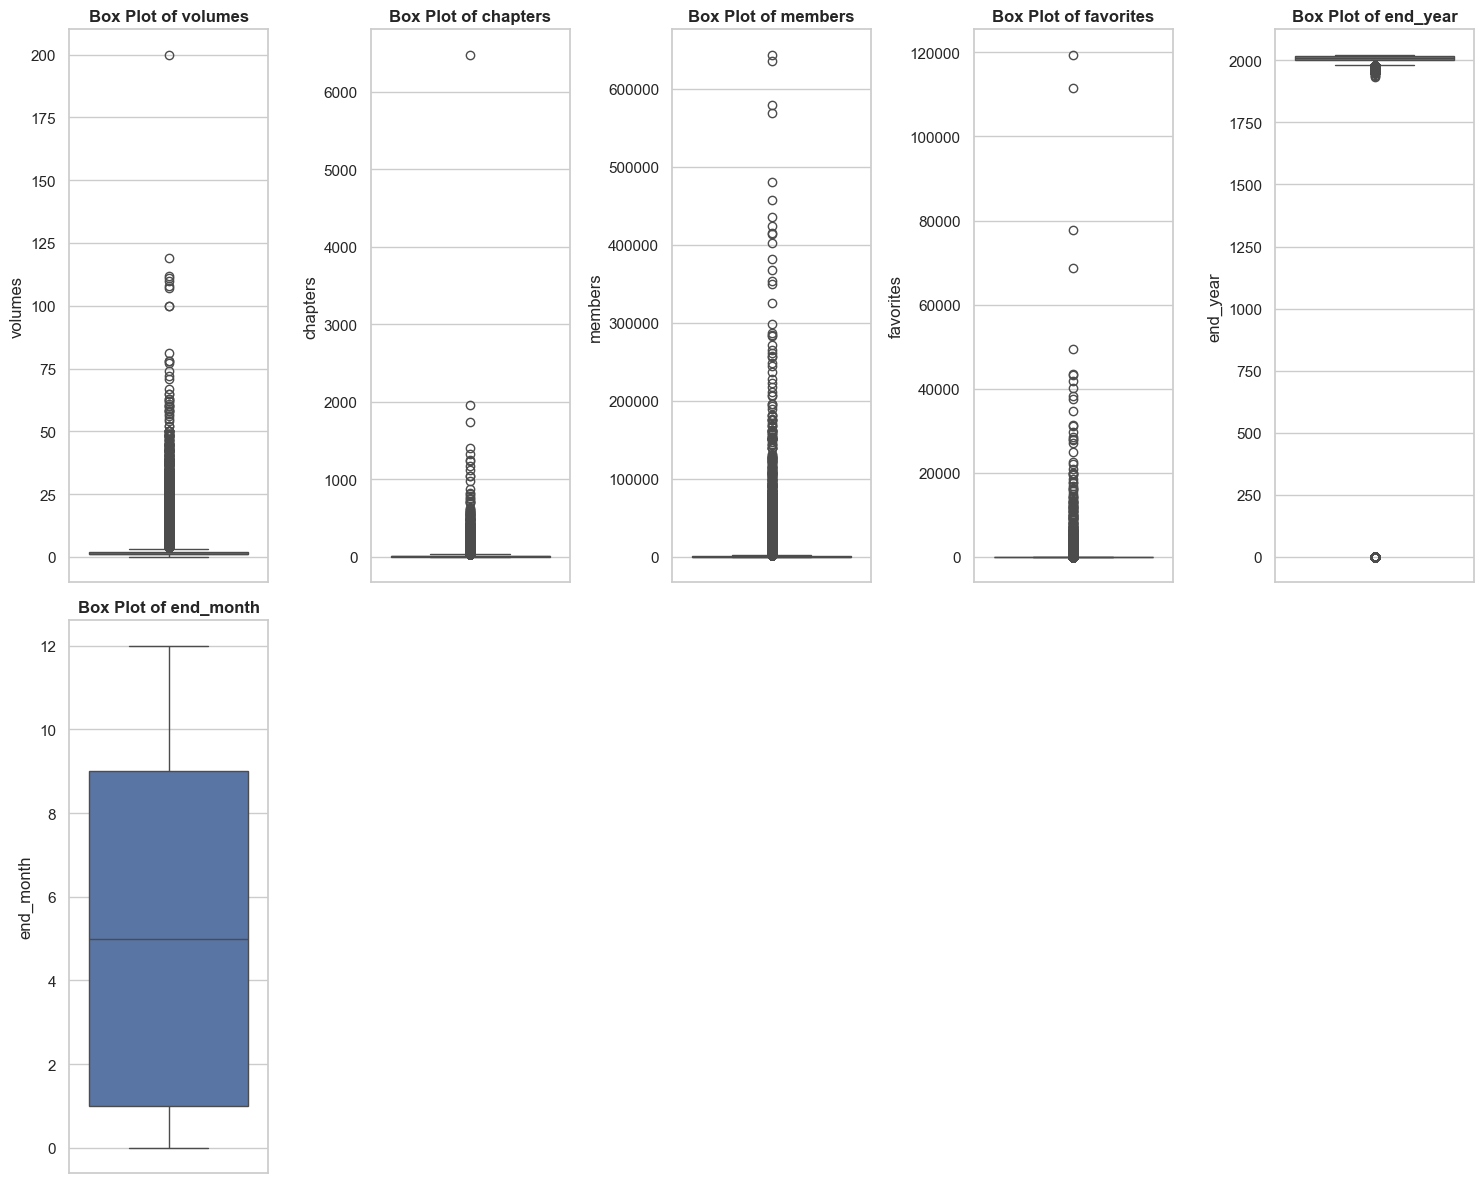

In [33]:
import seaborn as sns

numerical_columns = mangaCsv.select_dtypes(include=['float64', 'int64']).columns

num_cols = 5
num_rows = (len(numerical_columns) + num_cols - 1) // num_cols

plt.figure(figsize=(15, num_rows * 6))
sns.set(style="whitegrid") 

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=mangaCsv[column])
    plt.title(f'Box Plot of {column}', fontweight='bold')

plt.tight_layout()
plt.show()

The box plots show the distribution of manga dataset variables. 

Volumes and chapters exhibit right-skewed distributions with numerous outliers, indicating manga with exceptionally high counts. 

Members and favorites show wide-ranging distributions with many outliers, suggesting varying popularity levels. 

End year displays a tightly clustered distribution, while end month indicates a uniform distribution. 

Conclusively, volumes and chapters skew towards higher counts, while members and favorites vary widely, 

and end year and end month distributions are more uniform.

Applying logarithmic transformation

In [34]:
mangaCsv['volumes'] = mangaCsv['volumes'].replace(0, 1)
mangaCsv['chapters'] = mangaCsv['chapters'].replace(0, 1)

mangaCsv['log_volumes'] = np.log1p(mangaCsv['volumes'])
mangaCsv['log_chapters'] = np.log1p(mangaCsv['chapters'])

print(mangaCsv[['log_volumes', 'log_chapters']].head())

   log_volumes  log_chapters
0     0.693147      0.693147
1     0.693147      0.693147
2     3.218876      4.574711
3     2.639057      4.997212
4     3.332205      4.762174


In [35]:
mangaCsv['members'] = mangaCsv['members'].replace(0, 1)
mangaCsv['favorites'] = mangaCsv['favorites'].replace(0, 1)

mangaCsv['log_members'] = np.log1p(mangaCsv['members'])
mangaCsv['log_favorites'] = np.log1p(mangaCsv['favorites'])

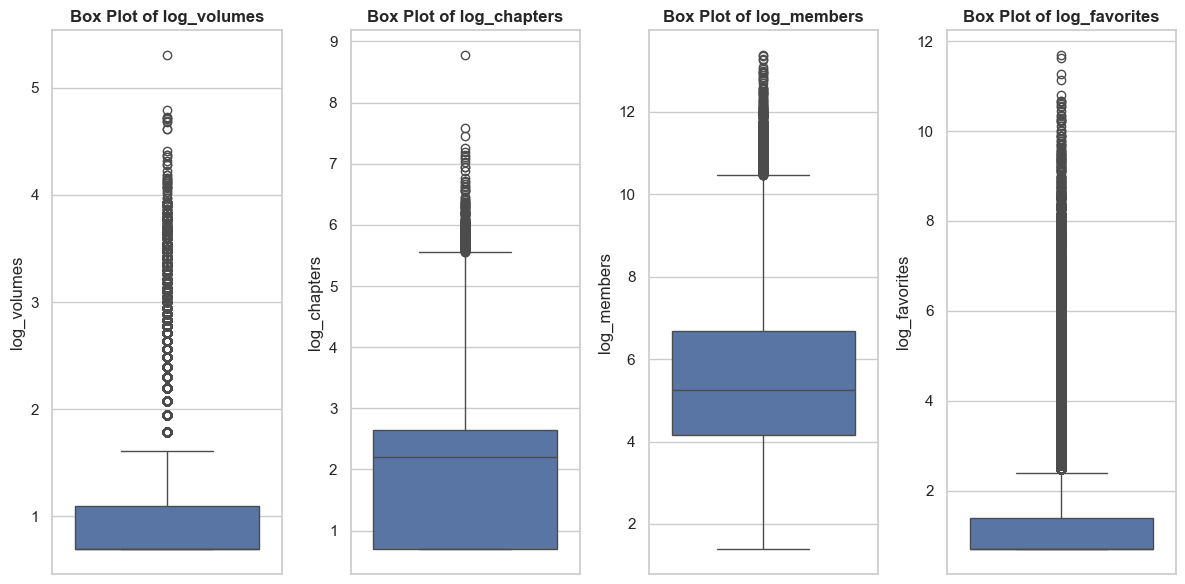

In [36]:
import seaborn as sns
columns_log = mangaCsv[['log_volumes', 'log_chapters', 'log_members', 'log_favorites']]

num_cols = 5
num_rows = (len(columns_log) + num_cols - 1) // num_cols
num_rows = 1 
plt.figure(figsize=(15, num_rows * 6))
sns.set(style="whitegrid") 

for i, column in enumerate(columns_log, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(y=mangaCsv[column])
    plt.title(f'Box Plot of {column}',fontweight='bold')

plt.tight_layout()
plt.show()

In log_volumes, most data points are concentrated at lower values, with outliers suggesting volumes with significantly higher counts. 

Log_chapters shows a slightly higher median and fewer outliers compared to log_volumes, indicating a more balanced distribution. 

Log_members exhibits a symmetrical distribution around the median, with some outliers at higher counts. 

Log_favorites depicts lower counts for most favorites, with a few outliers indicating significantly favored items. 

These transformations offer insights into central tendency and variability while pinpointing outliers, 

typical in skewed count data like volumes, chapters, members, and favorites.

Keeping the outliers after log transformation since they are less extreme but still present, it indicates they might be significant data points rather than errors or noise.

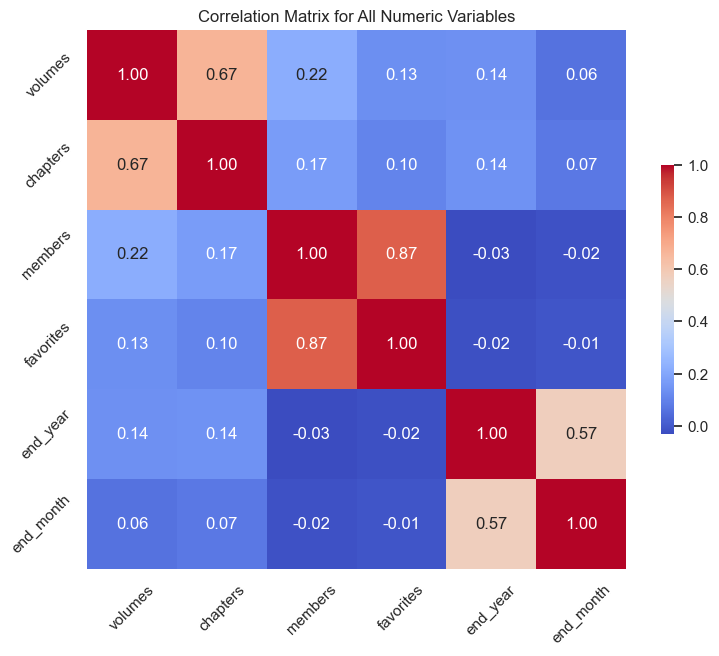

In [43]:
corr_matrix = mangaCsv[numerical_columns].corr()
plt.figure(figsize=(9, 7))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix for All Numeric Variables')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

Each cell represents the correlation between two variables, with colors indicating strength: 

warmer hues denote higher positive correlations, cooler ones signify lower or negative correlations. 

Notable correlations include a high positive correlation (0.67) between volumes and chapters, 

indicating their tendency to increase together. 

A very high positive correlation (0.87) between members and favorites suggests more members align with more favorites. 

A moderate positive correlation (0.57) between end year and end month hints at a connection between time variables, 

possibly indicating certain periods with more activity. 

Most other correlations range from weak to moderate, with many pairs showing little to no correlation (close to 0), 

implying no strong linear relationship. 

This correlation matrix aids in swiftly identifying relationships between variables, 

informing subsequent statistical analysis or predictive modeling in data analysis.

In [38]:
genres = mangaCsv['genres'].nunique()
type = mangaCsv['type'].nunique()

print(f"Number of unique categories in genres: {genres}")
print(f"Number of unique categories in type: {type}")

Number of unique categories in genres: 1788
Number of unique categories in type: 7


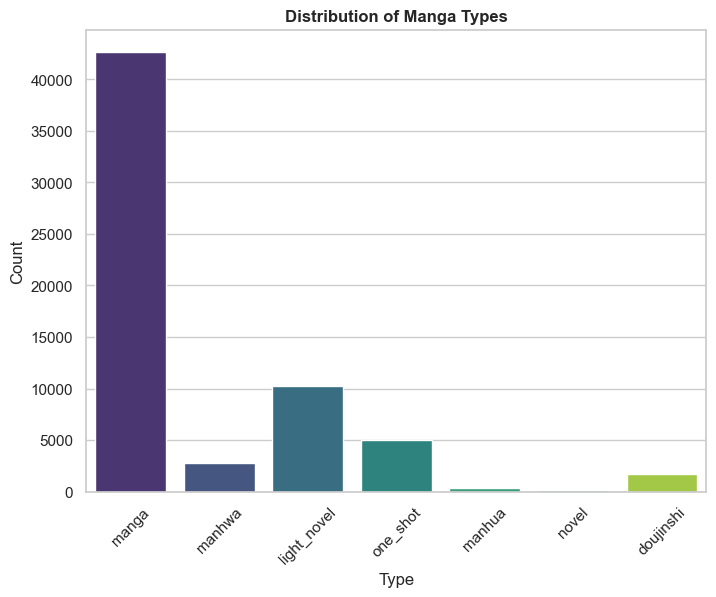

In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(data=mangaCsv, x='type', hue='type', palette='viridis', legend=False)
plt.title('Distribution of Manga Types', fontweight='bold')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


This illustrates the frequency count of various manga-related media types. 

Manga dominates the chart with the highest count, followed by light_novels, and one_shot. 

Manga stands out as the most prevalent type by a considerable margin, suggesting a specific focus on manga within the dataset. 

light_novels, and one_shot also show significant presence, while other types exhibit comparatively lower counts. 

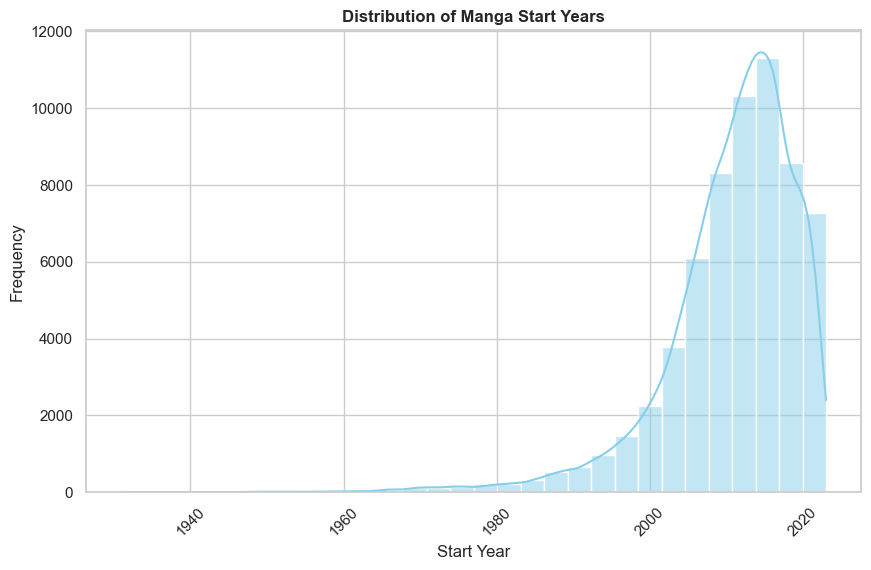

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(data=mangaCsv, x='start_year', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Manga Start Years', fontweight='bold')
plt.xlabel('Start Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


The histogram depicts the frequency distribution of manga start years. 

The x-axis denotes the start years of manga, spanning from the earliest available data to recent years, 

while the y-axis represents the frequency of manga starts in each year. 

The highest bar indicates a peak in manga starts around the early 2000s, suggesting a period of heightened production or popularity. 

There is an observable upward trend in manga starts from 1940 to the early 2000s, followed by a noticeable decline thereafter. 

This trend reflects evolving industry dynamics, shifts in consumer preferences, or other influences impacting manga production over time.

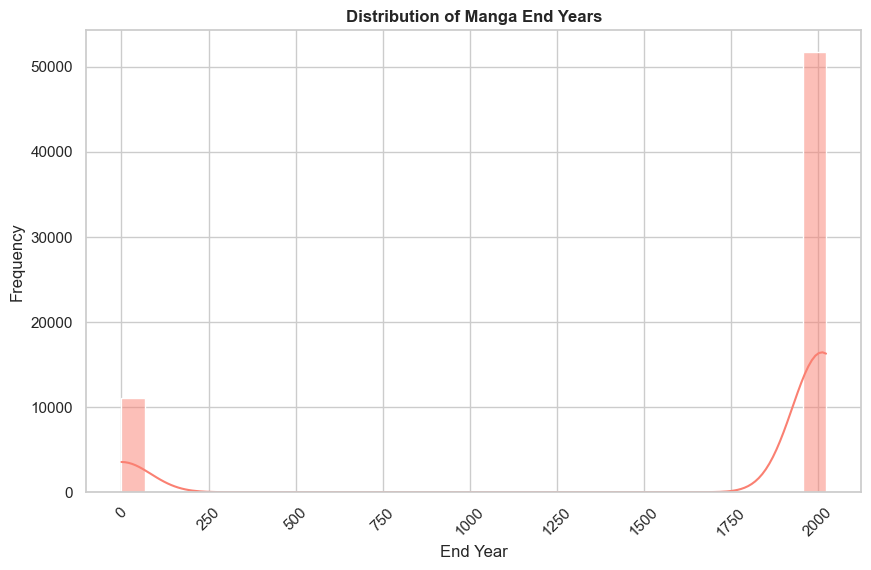

In [42]:
plt.figure(figsize=(10, 6))
sns.histplot(data=mangaCsv, x='end_year', bins=30, kde=True, color='salmon')
plt.title('Distribution of Manga End Years', fontweight='bold')
plt.xlabel('End Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


This illustrates the frequency distribution of manga series end years. 

The x-axis represents the years when manga series concluded, while the y-axis denotes the frequency of manga endings in each year. 

A prominent spike, particularly around the year 2000, suggests a clustering of manga series endings during that period.

There are notably smaller frequencies for earlier years, possibly reflecting outliers, data anomalies, or placeholders for ongoing series. 

Overall, the histogram indicates a substantial number of manga series either concluded recently or remain ongoing, 

with the spike around 2000 indicating a notable period of series conclusions or ongoing serialization.